In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statistics
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/ My Drive/Colab_TA/Dataset.csv", usecols=["Tanggal", "Kurs Jual"] )
df['Tanggal']= pd.to_datetime(df.Tanggal)
df

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
...,...,...
2704,2021-12-27,16202.12
2705,2021-12-28,16174.64
2706,2021-12-29,16202.59
2707,2021-12-30,16182.85


In [4]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
5,2011-01-10,11723.36
6,2011-01-11,11834.54
7,2011-01-12,11831.54
8,2011-01-13,11923.25
9,2011-01-14,12144.12


# Visualisasi Data

Text(0, 0.5, 'Kurs Jual')

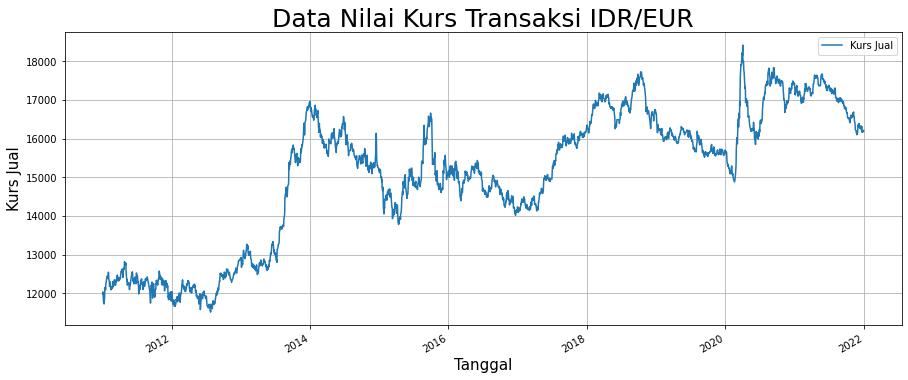

In [5]:
df.plot(x='Tanggal', y='Kurs Jual', grid='True', figsize=(15,6))
plt.title('Data Nilai Kurs Transaksi IDR/EUR', fontsize = 25)
plt.xlabel('Tanggal', fontsize = 15)
plt.ylabel('Kurs Jual', fontsize = 15)

### Visualisasi Data (Per Bulan) 

In [6]:
vis = px.line(df, x="Tanggal", y="Kurs Jual", title="Data Kurs Transaksi IDR/EUR")
vis.update_xaxes(dtick="M1", tickformat="%b\t%Y", ticklabelmode="period")
vis.update_layout(autosize=False, width=1600, height=850)
vis.show()

# Menentukan independent Variabel (X) and dependent Variabel (Y)

### Kurs Jual (Dataset ) 

In [7]:
Kurs_Jual = np.array(df['Kurs Jual'])
Kurs_Jual = Kurs_Jual.reshape(-1,1)
print(Kurs_Jual)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


### Menentukan X dan y 

In [8]:
#Menghapus kolom tabel tanggal
df.drop(['Tanggal'],axis=1,inplace=True)
df

,Kurs Jual
0,11983.50
1,12035.82
2,11993.59
3,11877.25
4,11778.29
5,11723.36
6,11834.54
7,11831.54
8,11923.25
9,12144.12


In [9]:
#Menentukan VariabeL untuk memprediksi 70 hari ke depan
prediction_future = 70
#Membuat variabel dependent atau target prediksi (kolom)  
df['Variabel Dependent (y)'] = df['Kurs Jual'].shift(prediction_future).fillna(pd.Series(reversed(df['Kurs Jual'])))
df

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


In [10]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


### Variabel Independent (x) 

In [11]:
#Membuat (mengambil hanya kolom kurs Jual ) Variabel Independent (X)
X = np.array(df.drop(['Variabel Dependent (y)'], axis=1))
print(X)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


In [12]:
X.shape

(2709, 1)

### Variabel Independent (y)

In [13]:
#Membuat (mengambil hanya kolom variabel dependent (y))
y = np.array(df['Variabel Dependent (y)'])
y=y.reshape(-1,1)
print(y)

[[16208.9 ]
 [16182.85]
 [16202.59]
 ...
 [16772.8 ]
 [16800.34]
 [16806.25]]


In [14]:
y.shape

(2709, 1)

### 70 hari Data Terakhir

In [16]:
#Membuat variabel prediction_days_array yang sama dengan 70 baris terakhir dari kumpulan dataset asli
actual_70days_array = np.array(df.drop(['Variabel Dependent (y)'],axis = 1))[-prediction_future:]
                                 
print(actual_70days_array)

[[16794.44]
 [16810.28]
 [16752.37]
 [16749.53]
 [16778.32]
 [16702.62]
 [16659.66]
 [16667.35]
 [16622.87]
 [16543.84]
 [16542.85]
 [16517.75]
 [16527.46]
 [16519.89]
 [16517.39]
 [16528.93]
 [16429.04]
 [16407.62]
 [16499.37]
 [16538.75]
 [16566.99]
 [16605.82]
 [16529.22]
 [16532.86]
 [16544.64]
 [16596.04]
 [16555.11]
 [16608.28]
 [16653.43]
 [16636.19]
 [16686.42]
 [16594.92]
 [16575.67]
 [16563.15]
 [16470.28]
 [16395.51]
 [16344.34]
 [16245.84]
 [16219.03]
 [16210.07]
 [16201.16]
 [16144.28]
 [16164.97]
 [16097.55]
 [16110.88]
 [16148.2 ]
 [16256.4 ]
 [16338.78]
 [16320.18]
 [16363.06]
 [16347.97]
 [16388.32]
 [16317.56]
 [16275.56]
 [16330.89]
 [16308.15]
 [16257.43]
 [16272.68]
 [16247.24]
 [16317.46]
 [16317.46]
 [16294.71]
 [16298.33]
 [16161.64]
 [16202.77]
 [16202.12]
 [16174.64]
 [16202.59]
 [16182.85]
 [16208.9 ]]


# Normalisasi Data

### Kurs Jual (Dataset) 

In [17]:
sc_KursJual = MinMaxScaler()
KursJual_scale = sc_KursJual.fit_transform(Kurs_Jual)
print(KursJual_scale)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel X 

In [18]:
scalerX =MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)
print(X)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel Y 

In [19]:
scalerY= MinMaxScaler()
scalerY.fit(y)
Y=scalerY.transform(y)
print(Y)

[[0.68023369]
 [0.67646011]
 [0.67931963]
 ...
 [0.76191973]
 [0.76590915]
 [0.76676527]]


### 70 Hari Data Terakhir 

In [22]:
sc_ActualArray = MinMaxScaler()
Actual70_scale = sc_ActualArray.fit_transform(actual_70days_array)
print(Actual70_scale)

[[0.9777756 ]
 [1.        ]
 [0.91874904]
 [0.91476436]
 [0.95515833]
 [0.84894701]
 [0.78867173]
 [0.79946123]
 [0.7370533 ]
 [0.6261698 ]
 [0.62478077]
 [0.58956407]
 [0.60318774]
 [0.59256661]
 [0.58905897]
 [0.60525024]
 [0.46509899]
 [0.43504553]
 [0.5637759 ]
 [0.61902824]
 [0.65865054]
 [0.7131312 ]
 [0.60565712]
 [0.61076424]
 [0.62729224]
 [0.69940931]
 [0.64198224]
 [0.71658272]
 [0.77993069]
 [0.75574201]
 [0.8262175 ]
 [0.69783789]
 [0.67082907]
 [0.65326281]
 [0.52296101]
 [0.41805452]
 [0.34626015]
 [0.20805915]
 [0.17044323]
 [0.15787184]
 [0.14537062]
 [0.0655648 ]
 [0.09459403]
 [0.        ]
 [0.01870273]
 [0.07106478]
 [0.22287542]
 [0.33845916]
 [0.31236233]
 [0.37252536]
 [0.35135325]
 [0.40796655]
 [0.30868632]
 [0.24975797]
 [0.32738905]
 [0.29548356]
 [0.22432057]
 [0.24571717]
 [0.21002343]
 [0.30854601]
 [0.30854601]
 [0.27662649]
 [0.28170555]
 [0.08992185]
 [0.14762954]
 [0.14671755]
 [0.10816158]
 [0.14737699]
 [0.11968066]
 [0.15623027]]


# Data Spliting

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1896, 1) (1896, 1)
(813, 1) (813, 1)


# Parameter Tuning

In [24]:
#Parameter dan kernel yang akan di uji
parameters_kernel = {'C': [0.1, 1, 10, 100],
                     'gamma' :[1, 0.1, 0.01, 0.001,],
                     'epsilon': [1e-4, 1e-3],
                     'kernel' :['rbf', 'poly', 'linear']}
#Mengukur score parameter tuning dengan rmse
def rmse(actual, predict):# penerapan sklearn.metrics
    prediksi = np.array(predict)
    aktual = np.array(actual)
    distance = prediksi - aktual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better=False)
model = SVR()
grid_search = GridSearchCV(SVR(),parameters_kernel,cv = 5, scoring=rmse_score, refit = True, verbose =3)
grid_search.fit(x_train,np.ravel(y_train))#penerapan scoring parameter sklearn.model_selection.cross_val_score

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.133 total time=   0.2s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.148 total time=   0.2s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.155 total time=   0.2s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.145 total time=   0.2s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.146 total time=   0.2s
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.164 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.173 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.176 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.173 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.171 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.000

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.0001, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=3)

In [25]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
-0.14368668468022763


# Model SVR

In [46]:
model70_svr = SVR(kernel='rbf', C=0.1 ,epsilon=0.001, gamma=0.1)
model70_svr.fit(x_train,np.ravel(y_train))

SVR(C=0.1, epsilon=0.001, gamma=0.1)

# Evaluasi Model

In [47]:
y_pred_test= model70_svr.predict(x_test)
y_pred_train = model70_svr.predict(x_train)

In [30]:
print('MSE  Train : {0:.5f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE  Train : {0:.5f}'.format(math.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R^2 Train : {0:.5f}'.format(r2_score(y_train, y_pred_train)))

MSE  Train : 0.02075
RMSE  Train : 0.14405
R^2 Train : 0.68196


In [31]:
print('MSE  Test : {0:.5f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE Test : {0:.5f}'.format(math.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R^2 Test: {0:.5f}'.format(r2_score(y_test, y_pred_test)))

MSE  Test : 0.01872
RMSE Test : 0.13684
R^2 Test: 0.69852


# Visualisasi Hasil

In [32]:
#Convert 1d array y to 2d
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

### Plot Prediksi VS Aktual (Test)

In [33]:
nilai_PrediksiTest = scalerX.inverse_transform(y_pred_test2d)
print(nilai_PrediksiTest)

[[16410.78307517]
 [15394.98471922]
 [17126.14635493]
 [14978.83241165]
 [15959.25693807]
 [15847.15590373]
 [12457.68026265]
 [12699.63135376]
 [15905.56582828]
 [15331.39925798]
 [15633.42859441]
 [15155.57303766]
 [16122.72226786]
 [12423.79278596]
 [12390.19299819]
 [16458.8662174 ]
 [17261.99710161]
 [14637.01860712]
 [15788.48050237]
 [14436.41799398]
 [14255.5900217 ]
 [14420.1722448 ]
 [15630.77812736]
 [12378.20315156]
 [14864.55910305]
 [16114.71345515]
 [16591.23899   ]
 [16095.9280253 ]
 [16835.94107192]
 [16397.01016319]
 [15701.81772485]
 [14229.06376601]
 [14493.78184282]
 [17051.10827916]
 [14288.72863219]
 [12507.74651902]
 [15389.49467482]
 [14948.3482381 ]
 [16950.83269028]
 [15982.14755858]
 [16790.48254036]
 [16115.751279  ]
 [12243.08860298]
 [14406.73054889]
 [12189.16681323]
 [15222.39113544]
 [12450.88085269]
 [15417.71712971]
 [12637.94847343]
 [12295.46164224]
 [15598.73094729]
 [15358.91805572]
 [15570.07723396]
 [12938.73710837]
 [12521.78222508]
 [12536.68

In [34]:
nilai_test = scalerX.inverse_transform(y_test2d)
print(nilai_test)

[[17239.06]
 [16275.38]
 [17235.75]
 [14201.89]
 [16082.22]
 [16446.85]
 [12372.51]
 [11654.79]
 [14917.43]
 [15543.89]
 [13271.52]
 [15670.14]
 [16327.56]
 [12301.52]
 [12325.53]
 [17408.32]
 [16100.83]
 [14525.71]
 [13659.89]
 [14303.66]
 [14637.95]
 [15498.81]
 [15648.35]
 [16395.51]
 [14034.83]
 [16806.25]
 [15736.17]
 [15908.73]
 [17356.5 ]
 [17277.54]
 [15644.4 ]
 [14750.54]
 [14482.2 ]
 [17579.85]
 [14739.93]
 [12204.39]
 [14455.62]
 [14269.75]
 [17292.19]
 [14578.77]
 [16224.13]
 [16984.4 ]
 [16208.9 ]
 [14380.38]
 [12111.28]
 [15494.36]
 [12398.59]
 [14420.79]
 [11787.07]
 [12386.7 ]
 [15515.93]
 [15131.46]
 [16232.23]
 [12465.37]
 [12009.77]
 [12348.53]
 [15911.01]
 [11710.59]
 [11746.46]
 [16141.99]
 [12172.6 ]
 [15362.5 ]
 [16348.33]
 [15583.22]
 [16935.45]
 [15326.39]
 [12405.52]
 [15600.66]
 [14877.97]
 [12733.56]
 [14387.05]
 [16253.93]
 [17398.09]
 [16207.57]
 [15613.01]
 [15612.35]
 [11923.25]
 [14561.96]
 [16130.58]
 [14621.93]
 [16573.76]
 [11841.42]
 [14902.63]
 [16

In [35]:
nilai_PrediksiTest.shape

(813, 1)

<function matplotlib.pyplot.show(*args, **kw)>

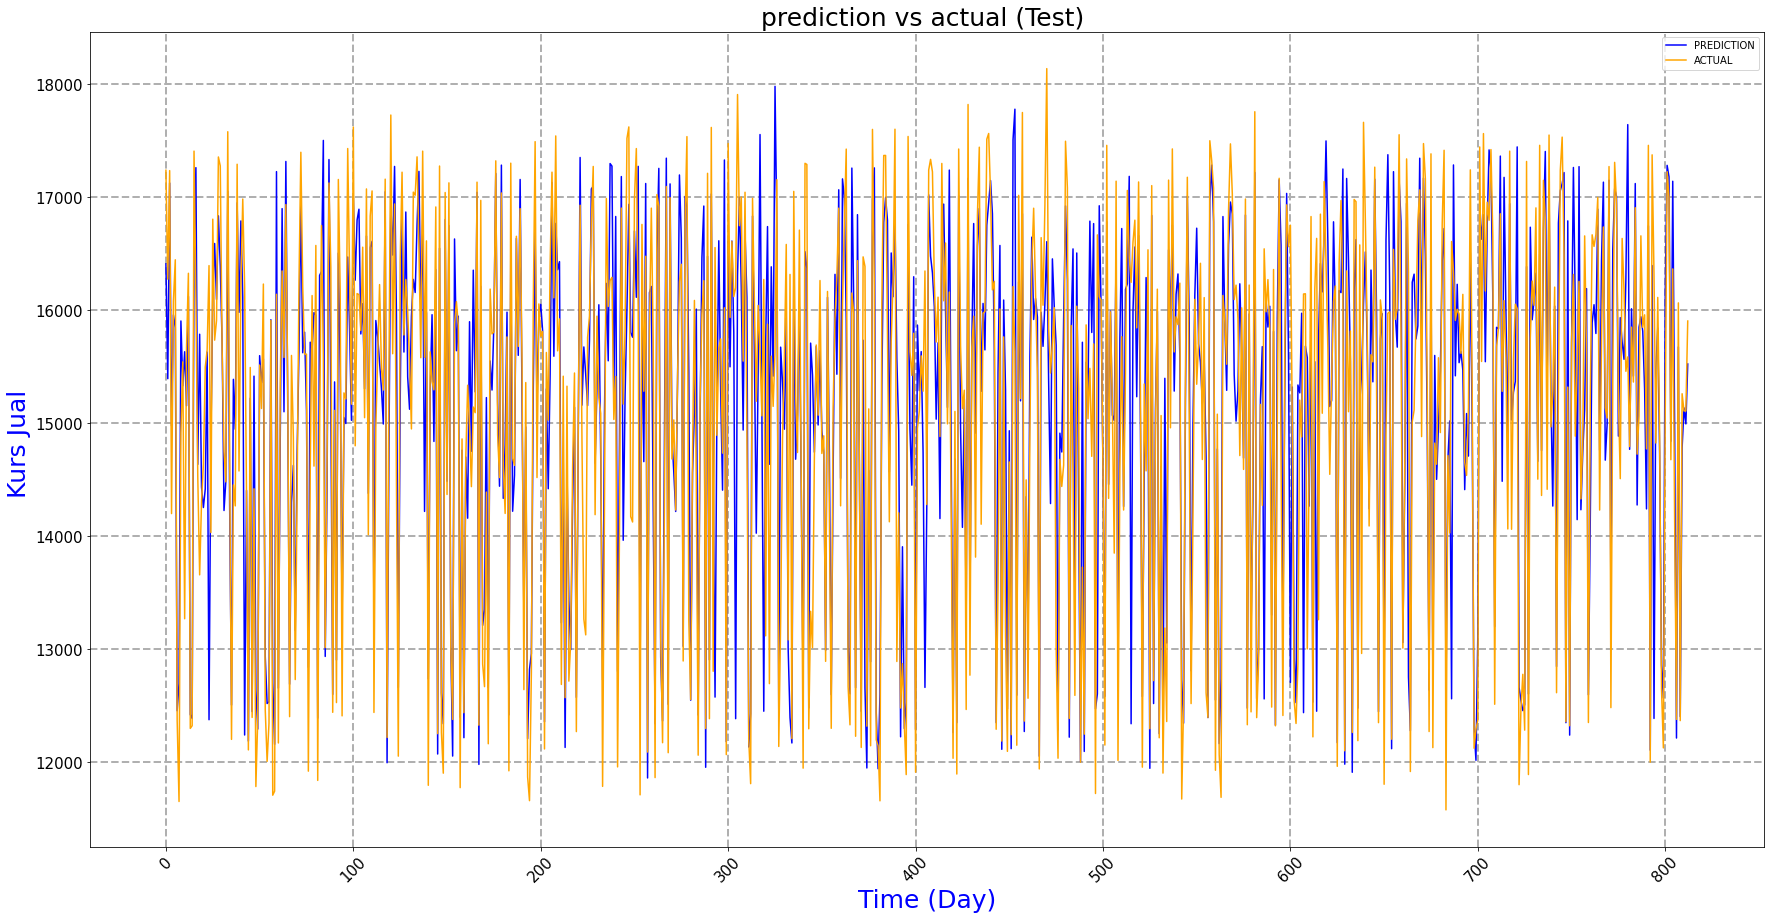

In [36]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest,label='PREDICTION', color='blue')
plt.plot(nilai_test,label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) ', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

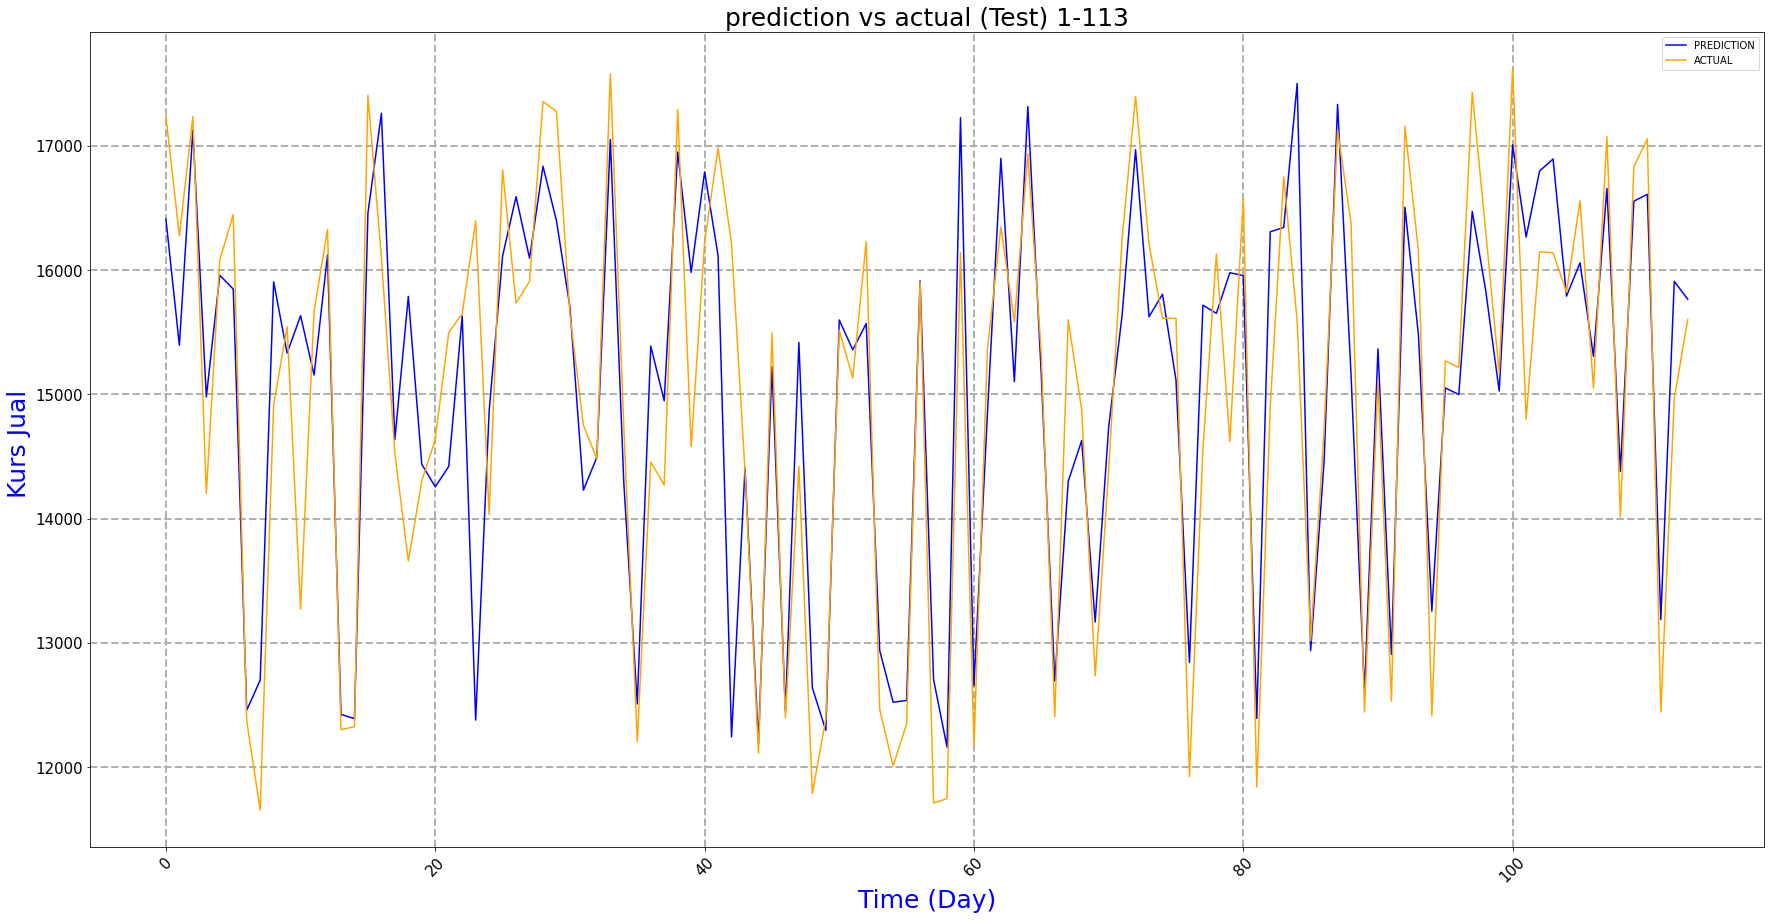

In [37]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[0:114],label='PREDICTION', color='blue')
plt.plot(nilai_test[0:114],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 1-113', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

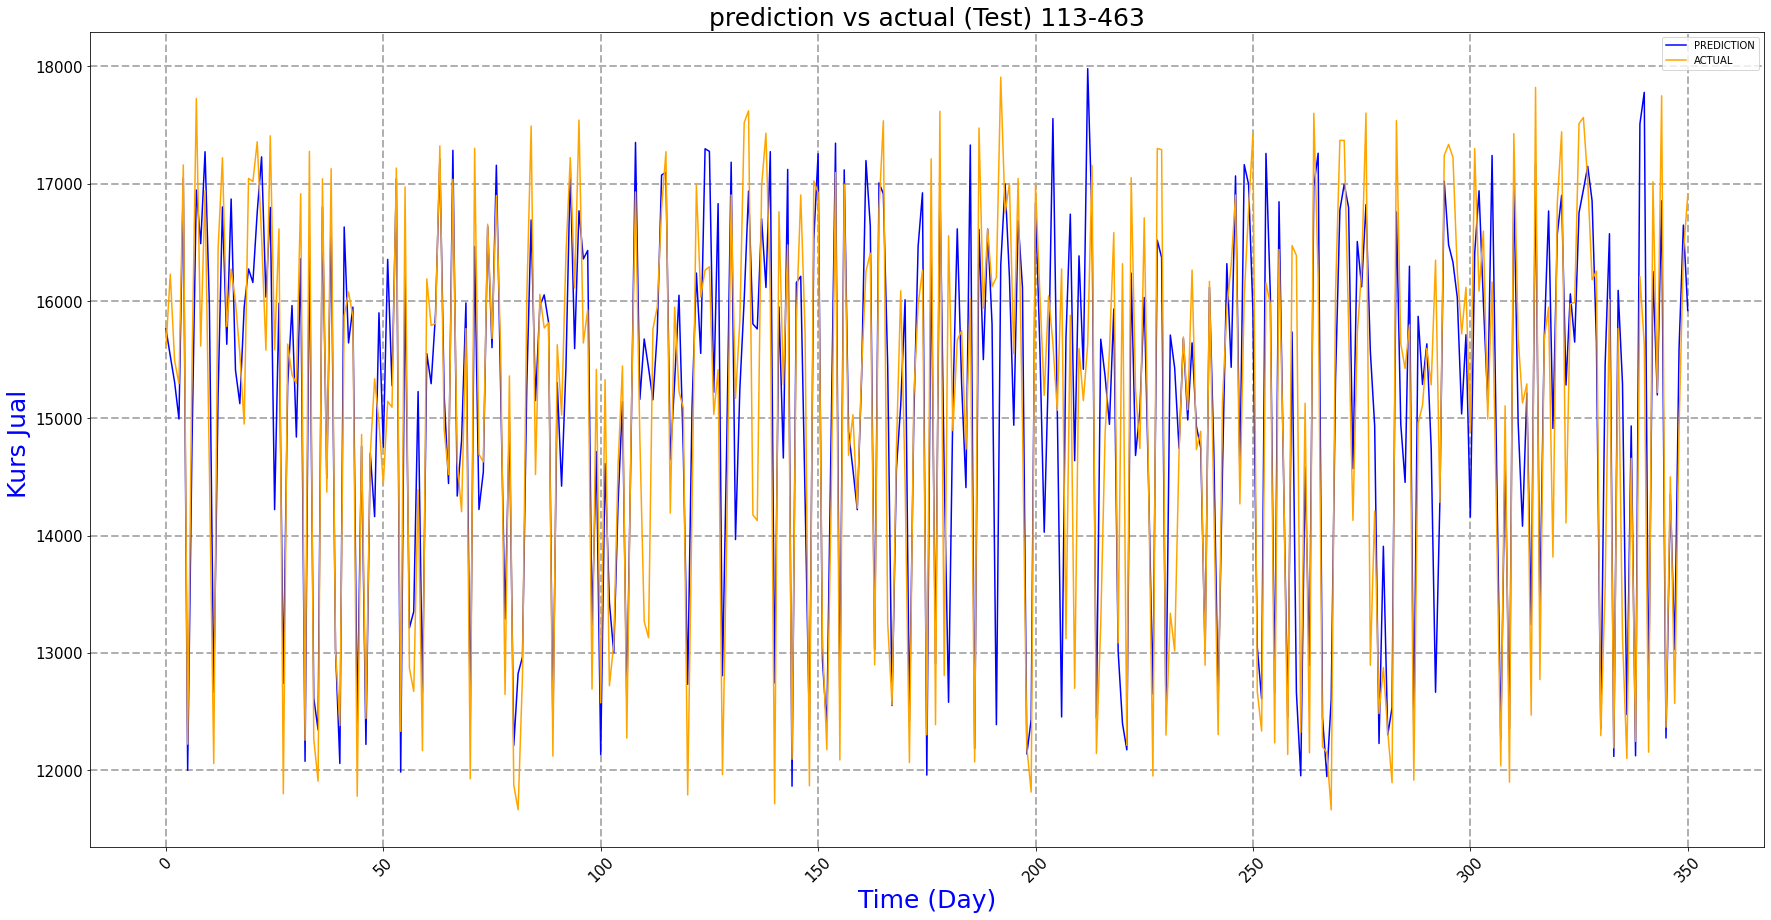

In [38]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[113:464],label='PREDICTION', color='blue')
plt.plot(nilai_test[113:464],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 113-463', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

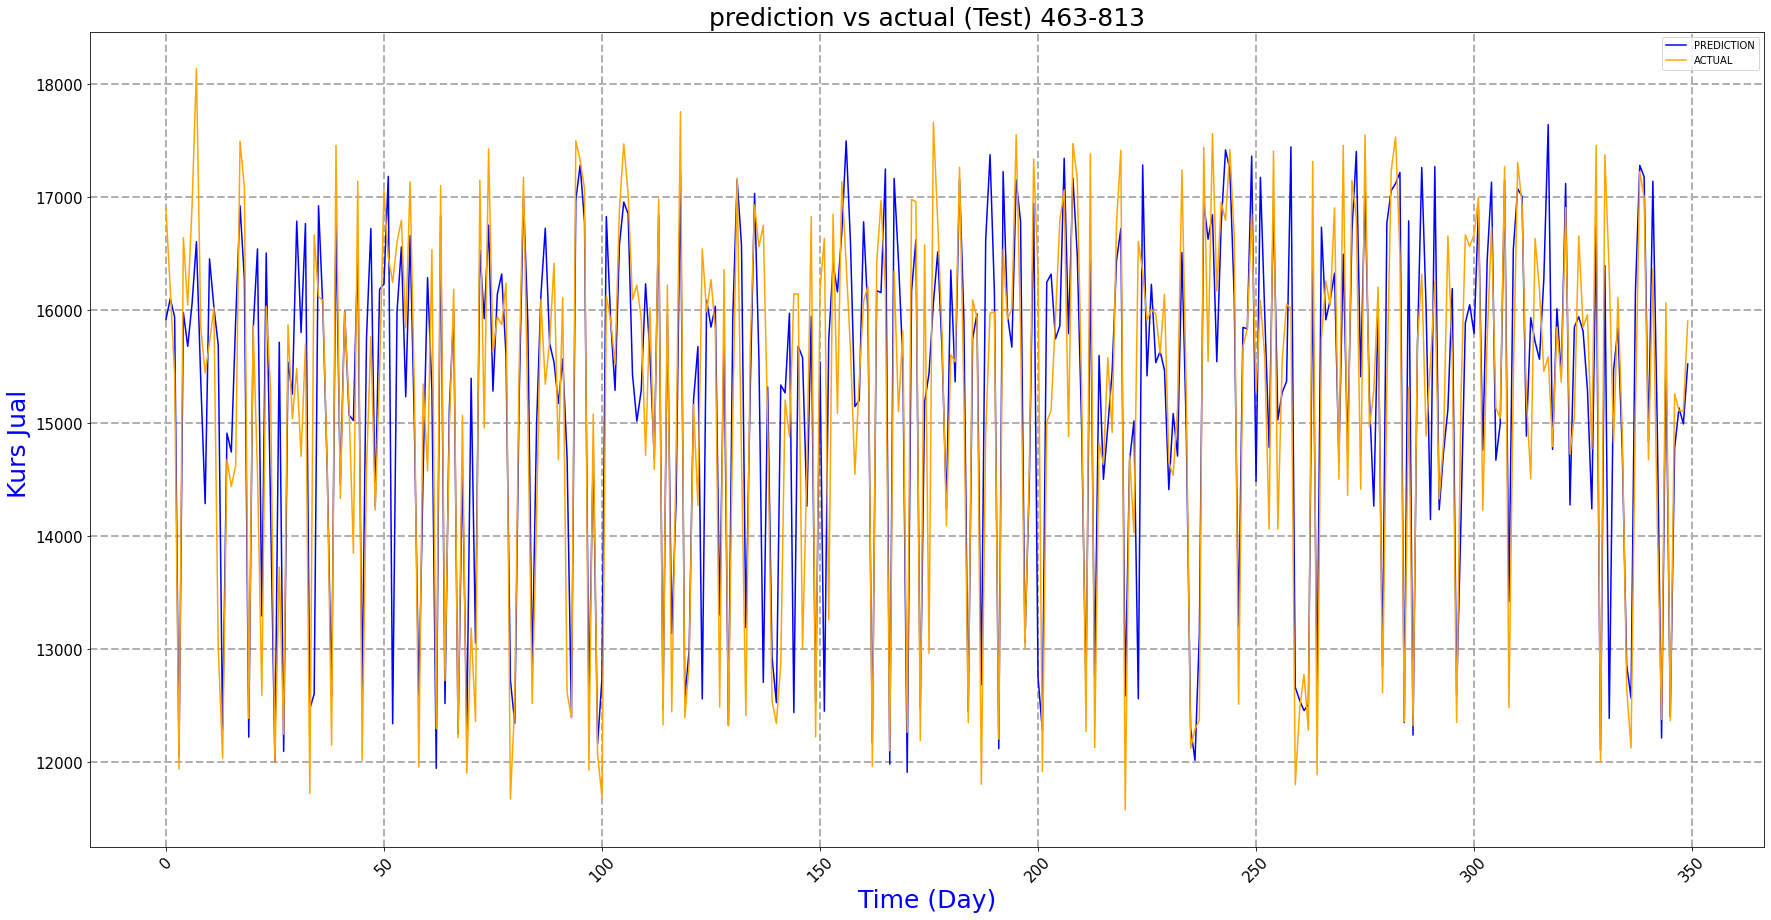

In [39]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[463:814],label='PREDICTION', color='blue')
plt.plot(nilai_test[463:814],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 463-813', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

### Plot Prediksi VS Aktual (Dataset Kurs Jual)

In [48]:
Prediksi_Kurs = model70_svr.predict(KursJual_scale)
print(Prediksi_Kurs.reshape(-1,1))

[[0.10574983]
 [0.11265873]
 [0.10708166]
 ...
 [0.66577901]
 [0.66324111]
 [0.66658991]]


In [49]:
NilaiPrediction_Kurs = scalerX.inverse_transform(Prediksi_Kurs.reshape(-1,1))
print(NilaiPrediction_Kurs)

[[12243.08860298]
 [12290.78252794]
 [12252.28251023]
 ...
 [16109.1156    ]
 [16091.59582154]
 [16114.71345515]]


<function matplotlib.pyplot.show(*args, **kw)>

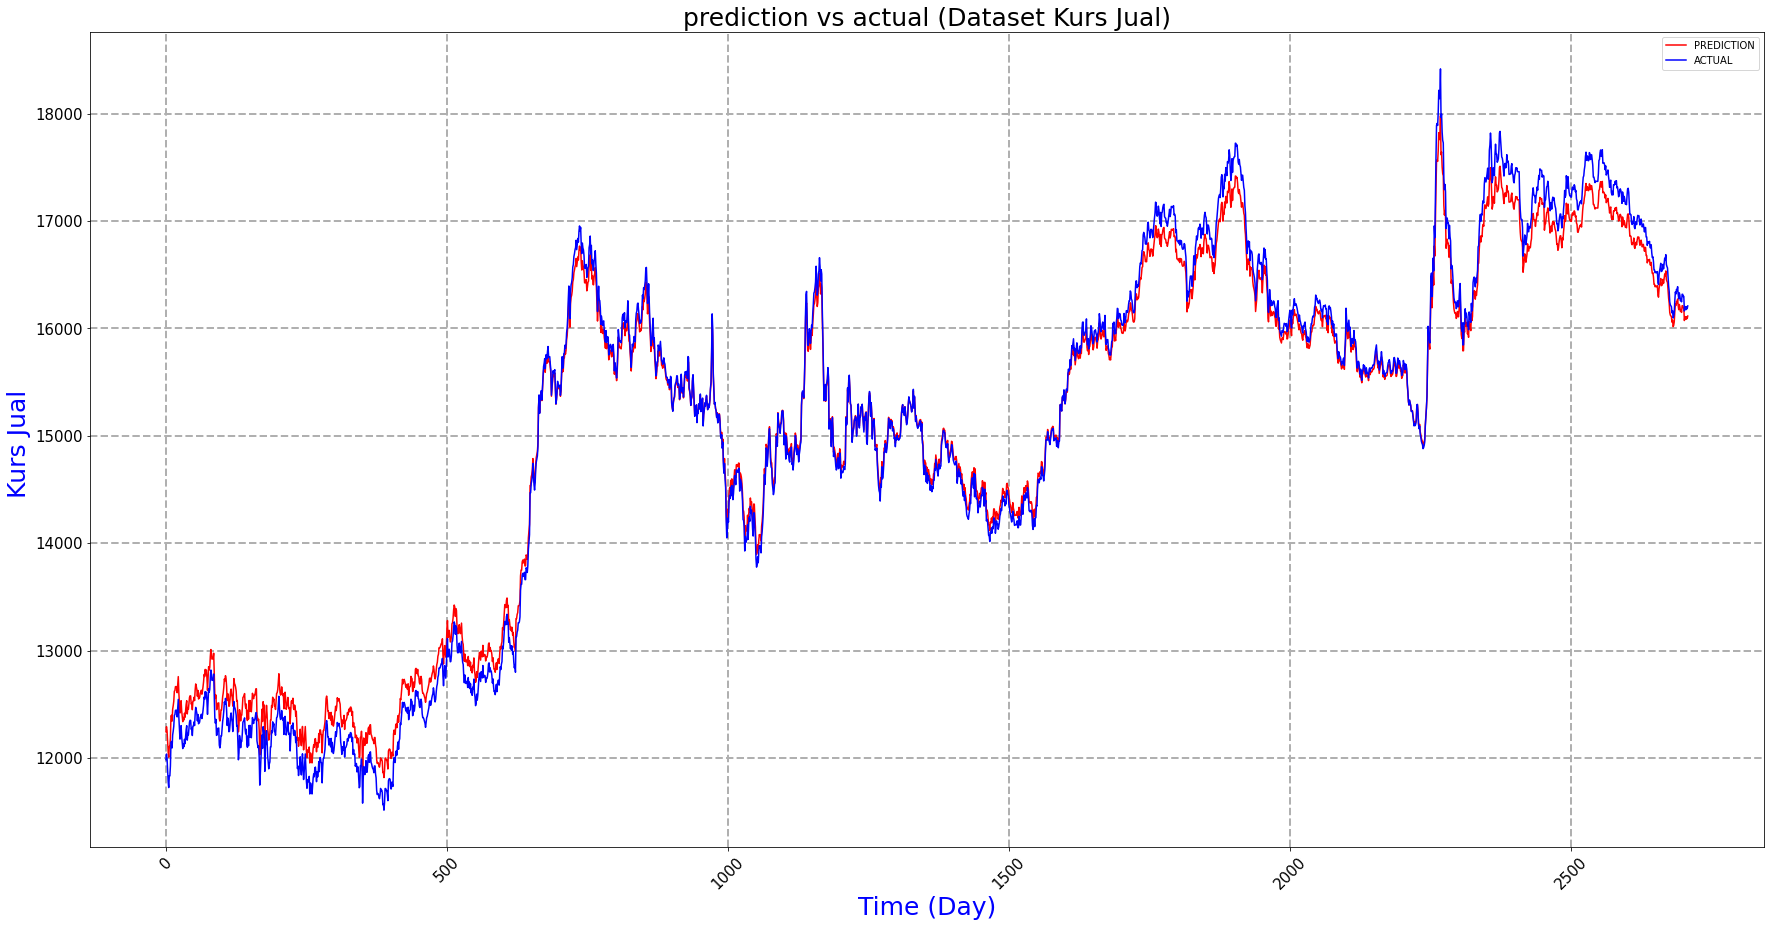

In [50]:
plt.figure(figsize=(30,15))
plt.plot(NilaiPrediction_Kurs,label='PREDICTION', color='red')
plt.plot(df['Kurs Jual'],label='ACTUAL', color='blue' )
plt.title('prediction vs actual (Dataset Kurs Jual)', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

In [51]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(KursJual_scale, Prediksi_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(KursJual_scale, Prediksi_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(KursJual_scale, Prediksi_Kurs)))

MSE  Prediksi : 0.00054
RMSE  Prediksi : 0.02327
R^2 Prediksi : 0.99158


In [52]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Kurs_Jual, NilaiPrediction_Kurs)))

MSE  Prediksi : 25806.61448
RMSE  Prediksi : 160.64437
R^2 Prediksi : 0.99158


# Prediksi 70 hari

In [54]:
prediction_70days = model70_svr.predict(Actual70_scale)
prediction_70days = prediction_70days.reshape(-1,1)
print(prediction_70days)

[[0.91921946]
 [0.93699994]
 [0.87117225]
 [0.86788723]
 [0.90094783]
 [0.81291197]
 [0.76146139]
 [0.7707439 ]
 [0.71664381]
 [0.61834591]
 [0.61709922]
 [0.58538139]
 [0.59767601]
 [0.58809358]
 [0.584925  ]
 [0.59953466]
 [0.47187313]
 [0.44421584]
 [0.56202986]
 [0.61193258]
 [0.64739763]
 [0.69565718]
 [0.59990125]
 [0.60450022]
 [0.61935308]
 [0.68356116]
 [0.6325135 ]
 [0.69869319]
 [0.75391896]
 [0.7329461 ]
 [0.7936282 ]
 [0.68217332]
 [0.65823855]
 [0.64259239]
 [0.52487937]
 [0.42854913]
 [0.36217801]
 [0.23424227]
 [0.19953266]
 [0.1879543 ]
 [0.17645315]
 [0.10339849]
 [0.12989007]
 [0.04399144]
 [0.06087142]
 [0.10840961]
 [0.24793586]
 [0.35495505]
 [0.33078456]
 [0.38648462]
 [0.36689294]
 [0.41923847]
 [0.32737938]
 [0.27280506]
 [0.34470318]
 [0.31514911]
 [0.24927206]
 [0.26906527]
 [0.23605708]
 [0.32724941]
 [0.32724941]
 [0.29768254]
 [0.30238672]
 [0.12561943]
 [0.17853038]
 [0.17769169]
 [0.14230567]
 [0.17829812]
 [0.15286235]
 [0.18644331]]


In [55]:
NilaiPrediction_70 = scalerX.inverse_transform(prediction_70days)
print(NilaiPrediction_70.reshape(-1,1))

[[17858.68092184]
 [17981.42423159]
 [17526.99852345]
 [17504.32117554]
 [17732.54709525]
 [17124.8126874 ]
 [16769.63598015]
 [16833.71553208]
 [16460.24852387]
 [15781.67258259]
 [15773.06639522]
 [15554.10994901]
 [15638.9829238 ]
 [15572.83292071]
 [15550.95932214]
 [15651.81365974]
 [14770.53288452]
 [14579.60742126]
 [15392.90825321]
 [15737.39967677]
 [15982.2241561 ]
 [16315.37236772]
 [15654.34431788]
 [15686.09218084]
 [15788.62535242]
 [16231.8704196 ]
 [15879.47515883]
 [16336.33074188]
 [16717.56863157]
 [16572.78750252]
 [16991.69184004]
 [16222.289771  ]
 [16057.06186274]
 [15949.05233523]
 [15136.44874567]
 [14471.45605146]
 [14013.2789839 ]
 [13130.10526536]
 [12890.4958363 ]
 [12810.567393  ]
 [12731.17194349]
 [12226.85665466]
 [12409.73495775]
 [11816.75433393]
 [11933.28126128]
 [12261.44973826]
 [13224.63570707]
 [13963.41700855]
 [13796.56184542]
 [14181.0737899 ]
 [14045.82734908]
 [14407.18218042]
 [13773.05495453]
 [13396.31426143]
 [13892.64564795]
 [13688.62

In [56]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Actual70_scale, prediction_70days)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Actual70_scale, prediction_70days))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Actual70_scale, prediction_70days)))

MSE  Prediksi : 0.00069
RMSE  Prediksi : 0.02623
R^2 Prediksi : 0.99059


In [58]:
print('MSE  Prediksi : {0:.3f}'.format(mean_squared_error(actual_70days_array, NilaiPrediction_70)))
print('RMSE  Prediksi : {0:.3f}'.format(math.sqrt(mean_squared_error(actual_70days_array, NilaiPrediction_70))))
print('R^2 Prediksi : {0:.3f}'.format(r2_score(actual_70days_array, NilaiPrediction_70)))

MSE  Prediksi : 5199956.189
RMSE  Prediksi : 2280.341
R^2 Prediksi : -138.990
